# HPS
$L = \{4, \mathbf{8^*}, 16\}$ -- length of random walk

$k = \{4, 8, \mathbf{16^*}\}$ -- count of random walks

$d = \{16, 32, \mathbf{64^*}\}$ -- embedding size

$\lambda = \{0, 0.25, \mathbf{0.5^*}, 0.75, 1\}$ -- mixing parameter

dataset: Cora(x10)

model: Avg/GRU

metrics: auc,acc,f1

In [1]:
SEARCH_SPACE = {
    'L': [4, 8, 16],
    'k': [4, 8, 16],
    'd': [16, 32, 64],
    'mixing': [0, 0.25, 0.5, 0.75, 1],
}

DEFAULT_PARAMETERS = {'L': 8, 'k': 16, 'd': 64, 'mixing': 0.5}

DATASETS = ['cora', 'citeseer', 'pubmed']

MODEL_NAMES = ['Avg', 'GRU']

# Plots

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
dfs = {
    dataset_name: {
        model_name: pd.read_csv(
            filepath_or_buffer=f'../../data/hps/results-{dataset_name}-{model_name}.csv', 
            sep=';', 
            header=None, 
            names=[
                'dataset', 'k', 'L', 'model_name', 'emb_dim', 'mixing', 
                'dataset_idx', 'tt', 'acc', 'auc', 'f1',
            ])
        for model_name in MODEL_NAMES
    }
    for dataset_name in DATASETS
}

display(dfs['cora']['Avg'])
display(dfs['cora']['GRU'])

,dataset,k,L,model_name,emb_dim,mixing,dataset_idx,tt,acc,auc,f1
0,cora,4,8,Avg,64,0.5,0,train,0.90625,0.990759,0.904034
1,cora,4,8,Avg,64,0.5,0,val,0.76400,0.939768,0.753063
2,cora,4,8,Avg,64,0.5,0,test,0.78200,0.938139,0.776710
3,cora,4,8,Avg,64,0.5,1,train,0.87500,0.987411,0.866541
4,cora,4,8,Avg,64,0.5,1,val,0.72300,0.927842,0.717634
...,...,...,...,...,...,...,...,...,...,...,...
325,cora,16,8,Avg,64,1.0,8,val,0.68100,0.905294,0.680495
326,cora,16,8,Avg,64,1.0,8,test,0.72600,0.922753,0.714472
327,cora,16,8,Avg,64,1.0,9,train,0.80000,0.977143,0.788712
328,cora,16,8,Avg,64,1.0,9,val,0.72200,0.937115,0.702268


,dataset,k,L,model_name,emb_dim,mixing,dataset_idx,tt,acc,auc,f1
0,cora,4,8,GRU,64,0.5,0,train,0.91250,0.993527,0.914192
1,cora,4,8,GRU,64,0.5,0,val,0.75800,0.937022,0.739872
2,cora,4,8,GRU,64,0.5,0,test,0.76000,0.933677,0.745743
3,cora,4,8,GRU,64,0.5,1,train,0.83125,0.980491,0.814797
4,cora,4,8,GRU,64,0.5,1,val,0.69700,0.916219,0.694222
...,...,...,...,...,...,...,...,...,...,...,...
325,cora,16,8,GRU,64,1.0,8,val,0.68500,0.903871,0.679528
326,cora,16,8,GRU,64,1.0,8,test,0.71300,0.914148,0.696803
327,cora,16,8,GRU,64,1.0,9,train,0.78750,0.969330,0.769810
328,cora,16,8,GRU,64,1.0,9,val,0.70200,0.925898,0.681577


In [4]:
def compute_stats(df, defaults, k=None, L=None, emb_dim=None, mixing=None):
    params = {
        'k': defaults['k'] if k is None else k,
        'L': defaults['L'] if L is None else L,
        'emb_dim': defaults['d'] if emb_dim is None else emb_dim,
        'mixing': defaults['mixing'] if mixing is None else mixing,
    }
    
    p_df = df[
        (df.k == params['k'])
        & (df.L == params['L'])
        & (df.emb_dim == params['emb_dim'])
        & (df.mixing == params['mixing'])
        & (df.tt == 'test')
    ]
    
    s = {}
    for metric in ('acc', 'auc', 'f1'):
        s[metric] = {'mean': np.mean(p_df[metric]), 'std': np.std(p_df[metric]), 'all': p_df[metric]}
        
    return s

In [5]:
all_stats = {}

for dataset_name in DATASETS:
    all_stats[dataset_name] = {}
    
    for model_name in MODEL_NAMES:
        alls = {}

        alls['k'] = {}
        for k in SEARCH_SPACE['k']:
            alls['k'][k] = compute_stats(
                df=dfs[dataset_name][model_name], 
                defaults=DEFAULT_PARAMETERS, 
                k=k,
            )


        alls['L'] = {}
        for L in SEARCH_SPACE['L']:
            alls['L'][L] = compute_stats(
                df=dfs[dataset_name][model_name], 
                defaults=DEFAULT_PARAMETERS, 
                L=L,
            )


        alls['d'] = {}
        for d in SEARCH_SPACE['d']:
            alls['d'][d] = compute_stats(
                df=dfs[dataset_name][model_name], 
                defaults=DEFAULT_PARAMETERS, 
                emb_dim=d,
            )


        alls['mixing'] = {}
        for mixing in SEARCH_SPACE['mixing']:
            alls['mixing'][mixing] = compute_stats(
                df=dfs[dataset_name][model_name], 
                defaults=DEFAULT_PARAMETERS, 
                mixing=mixing,
            )

        all_stats[dataset_name][model_name] = alls

In [6]:
def make_comparison_plot(stats, title, min_val):
    fig, ax = plt.subplots()
    
    for metric, offset in zip(('acc', 'auc', 'f1'), (0, 0.3, 0.6)):
        keys = sorted(stats.keys())
        x_pos = [v + offset for v in range(len(keys))]
        
        means = [stats[key][metric]['mean'] for key in keys]
        std = [stats[key][metric]['std'] for key in keys]
        
        ax.bar(
            x_pos, means, yerr=std, 
            align='center', 
            width=0.3,
            alpha=0.5, ecolor='black', capsize=10,
            label=metric
        )
    
    ax.set(
        ylabel='Metric value',
        xticks=[v + 0.3 for v in range(len(keys))],
        xticklabels=keys,
        title=title,
        ylim=(min_val, 1),
    )
    
    ax.legend()
    fig.tight_layout()
    
    
def make_boxplots(stats):
    fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

    for metric, ax in zip(('acc', 'auc', 'f1'), axs):
        xs, ys = [], []
        minv, maxv = 2, -1
        for k, v in stats.items():
            xs.append(k)
            ys.append(v[metric]['all'].values)
            minv = min(minv, *v[metric]['all'].values)
            maxv = max(maxv, *v[metric]['all'].values)

        sns.boxplot(x=xs, y=ys, ax=ax)
        ax.set(title=metric, ylim=(minv - 0.01, maxv + 0.01))
    
    fig.tight_layout()
    
    
def make_comparison_tables(stats, keys):
    for key in keys:
        records = []
        vals = sorted(stats[key])
        for metric in ('acc', 'auc', 'f1'):
            means = [np.round(stats[key][v][metric]['mean'] * 100., 2) for v in vals]
            stds = [np.round(stats[key][v][metric]['std'] * 100., 2) for v in vals]
            records.append((metric, *[f'{m} +/- {s}' for m, s in zip(means, stds)]))
            
        df = pd.DataFrame.from_records(
            records, 
            columns=['metric', *[f'{key} = {v}' for v in vals]],
            index='metric'
        )
        display(df)
        
        
def make_comparison(stats):
#     make_comparison_plot(stats=stats['k'], title='Number of random walks', min_val=0.7)
#     make_boxplots(stats=stats['k'])
    
#     make_comparison_plot(stats=stats['L'], title='Random walk length', min_val=0.7)
#     make_boxplots(stats=stats['L'])
    
#     make_comparison_plot(stats=stats['d'], title='Embedding dimension', min_val=0.7)
#     make_boxplots(stats=stats['d'])
    
    make_comparison_plot(stats=stats['mixing'], title='Mixing value', min_val=0.7)
    make_boxplots(stats=stats['mixing'])
    
#     make_comparison_tables(stats=stats, keys=('k', 'L', 'd', 'mixing'))
    make_comparison_tables(stats=stats, keys=('mixing',))

In [7]:
#make_comparison(all_stats['GRU'])

In [23]:
def make_comparison_plot_2(stats, model_name, parameters, metric):
    titles = {
        'k': 'Number of random walks',
        'L': 'Random walk length',
        'd': 'Embedding size',
        'mixing': 'Mixing parameter',
    }
    
    xticks = {
        'k': 'k',
        'L': 'L',
        'd': 'd',
        'mixing': '$\lambda$',
    }
    
    colors = sns.color_palette('Set2')
    custom_lines = [
        plt.Line2D([0], [0], color=colors[0], alpha=0.4, lw=4),
        plt.Line2D([0], [0], color=colors[1], alpha=0.4, lw=4),
        plt.Line2D([0], [0], color=colors[2], alpha=0.4, lw=4),
    ]
    
    width = 0.3
    
    for parameter in parameters:
        fig, ax = plt.subplots(figsize=(8.5, 4.8))

        for idx, dataset_name in enumerate(stats.keys()):
            s = stats[dataset_name][model_name][parameter]

            keys = sorted(s.keys())
            x_pos = [v + idx * width for v in range(len(keys))]

            means = [s[key][metric]['mean'] for key in keys]
            std = [s[key][metric]['std'] for key in keys]

            bar_kwargs = dict(
                x=x_pos, height=means, yerr=std, 
                align='center', 
                width=width,
                capsize=10,
                color=colors[idx], ecolor=colors[idx],
            )
            
            ax.bar(**bar_kwargs, fill=False)
            ax.bar(**bar_kwargs, alpha=0.4, label=dataset_name,)
            
            for xx, mn in zip(x_pos, means):
                ax.text(
                    x=xx - 0.15 if parameter == 'mixing' else xx - 0.10, 
                    y=mn + 0.001, s='%.2f' % np.round(mn * 100., 2), 
                    fontsize=12, color=colors[idx],
                    fontweight='bold',
                )

        ax.set(
            ylabel=f'{metric.upper()}',
            xticks=[v + 0.3 for v in range(len(keys))],
            xticklabels=keys,
            ylim=(0.81 if model_name == 'GRU' else 0.84, 0.97),
        )
        
        ax.set_ylabel(f'{metric.upper()}', size=16)
        ax.set_title(titles[parameter], size=16, weight='bold')
        ax.set_xticklabels([f'{xticks[parameter]} = {k}' for k in keys], size=16)
        

        fig.legend(
            custom_lines,
            stats.keys(),
            loc='upper center', bbox_to_anchor=(.55, 0.9),
            fontsize=16,
            fancybox=True, shadow=True, ncol=3,
        )
        fig.tight_layout()
        fig.savefig(f'../../data/paper/hps-{model_name}-{parameter}.png')


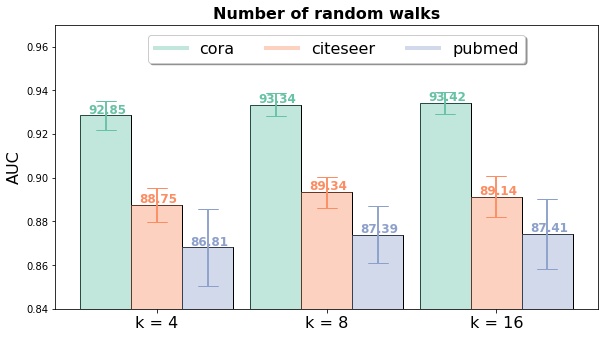

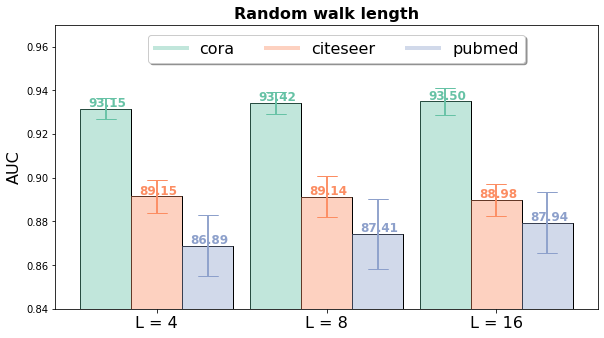

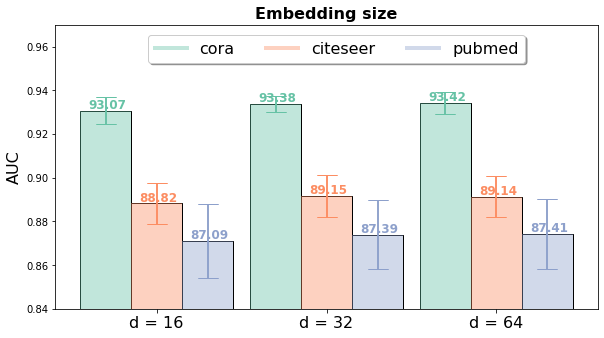

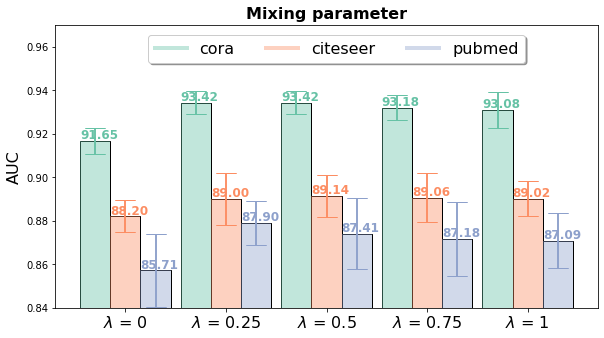

In [24]:
make_comparison_plot_2(
    all_stats, 
    model_name='Avg', 
    parameters=['k', 'L', 'd', 'mixing'], 
    metric='auc',
)

In [10]:
# make_comparison_plot_2(
#     all_stats, 
#     model_name='GRU', 
#     parameters=['k', 'L', 'd', 'mixing'], 
#     metric='auc',
# )